In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/heart.csv')
data.shape

(299, 14)

## Data check

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.391304,0.67893,0.966555,131.525084,246.665552,0.150502,0.528428,149.698997,0.324415,1.039799,1.397993,0.695652,2.314381,0.545151
std,8.984554,0.46767,1.032469,17.557820,51.787464,0.358162,0.526188,22.820492,0.468941,1.161919,0.617526,0.981890,0.614282,0.498792
min,29.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.00000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.00000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Let's describe each feature:

'age' : age of the individual in years

'sex' : sex (0 = female, 1 = male)

'cp' : chest pain type, displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non—anginal pain 3 = asymptotic (Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.)

'trestbps' : resting blood pressure (in mm Hg on admission to the hospital)

'chol' : serum cholestoral in mg/dl

'fbs' : fasting blood sugar > 120 mg/dl (0 = false, 1 = true)

'restecg' : resting electrocardiographic results: 0 = normal 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV) 2 = left ventricular hyperthrophy

'thalach' : maximum heart rate achieved in beats per minute (bpm)

'exang' : exercise induced angina (0 = no, 1 = yes)

'oldpeak' : ST depression induced by exercise relative to rest

'slope' : the slope of the peak exercise ST segment : 0 = upsloping 1 = flat 2 = downsloping

'ca' : number of major vessels (0-3) colored by flourosopy

'thal' : thalassemia: 3 = normal; 6 = fixed defect; 7 = reversable defect

'target' : Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 0 = absence 1 = present.

# Let's have an overall look into the histogram of each feature

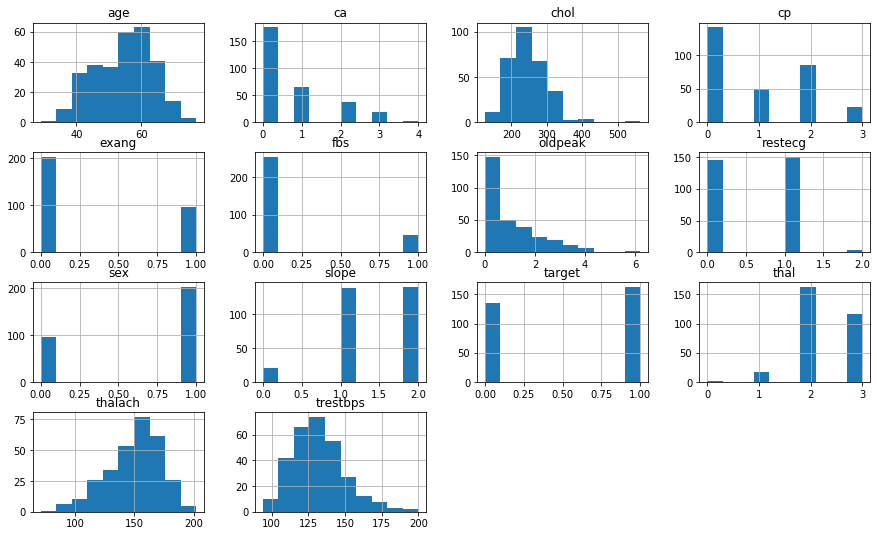

In [9]:
data.hist(figsize=(15,9))
plt.show()

# age follows a distribution between 30 and 70 years, almost normally distributed but skewed around 60 years
# chol (cholesterol) also has a normal distribution surrounding 250 mg/dl
# cp (chest pain) most of the values are for 0 and 2 types, good as each value determines the presence of heart disease or not (explained later)
# sex, in our sample we have double number of males than females
# exang (exercise induced angina) this also predicts the presence of disease or not, explained later
# oldpeak, has 6 different values, most of them are 0 type, and it is our target as this particulary helps diagnose the presence of disease

# And now, into the correlations heatmap

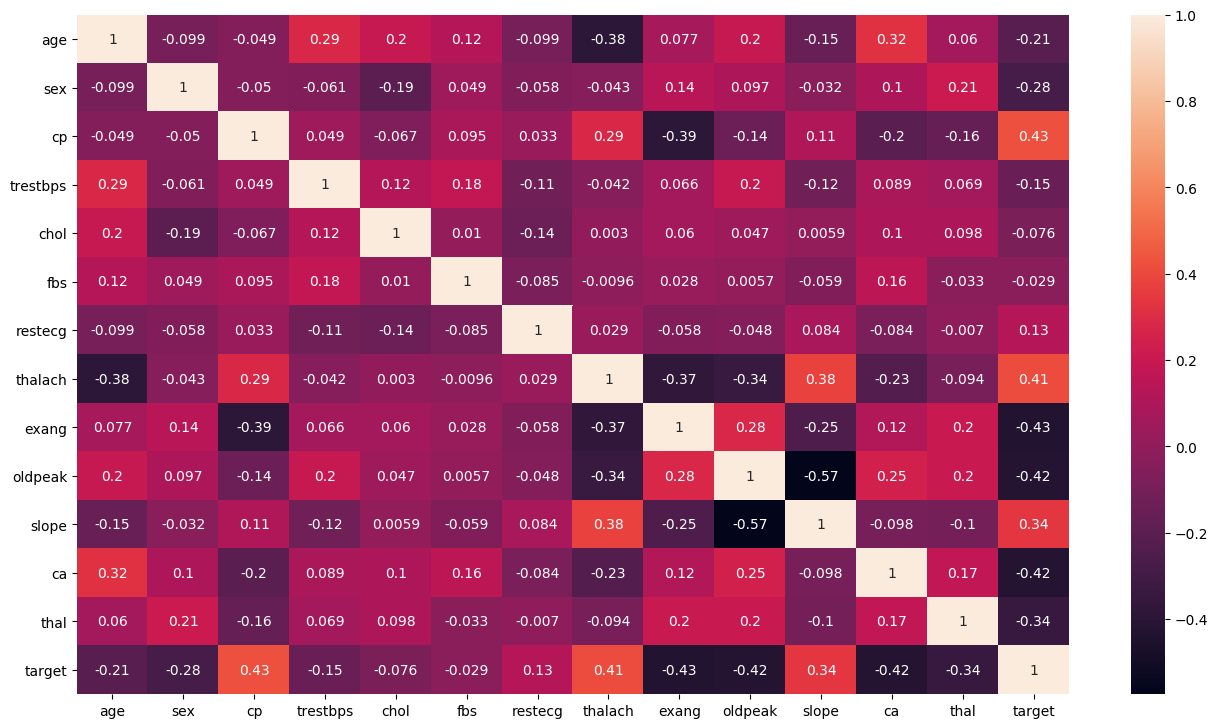

In [10]:
plt.figure(figsize= (16,9), dpi=100)
sns.heatmap(data.corr(), annot=True)

In [11]:
# separating the positive and negative correlations regarding the target.
positive_corr = data[['cp', 'thalach', 'slope', 'target']]
negative_corr = data[['age', 'sex', 'exang', 'oldpeak', 'ca', 'thal', 'target']]

<Figure size 2400x2400 with 0 Axes>

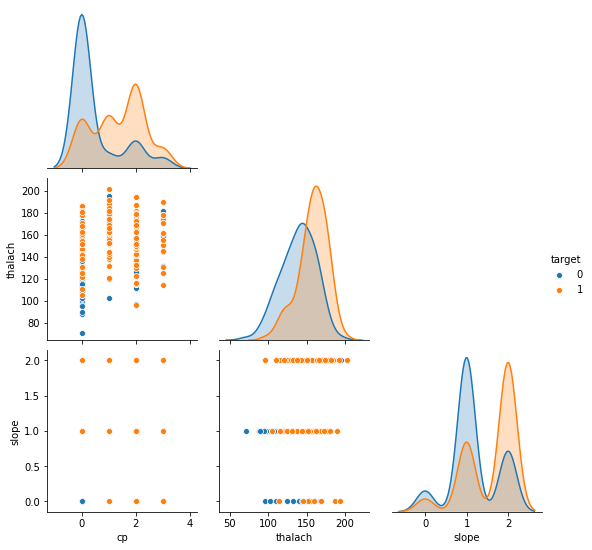

In [12]:
# let's explore the positive correlations
plt.figure(figsize= (16,16), dpi=150)
sns.pairplot(positive_corr, hue='target', corner=True)

<Figure size 2400x2400 with 0 Axes>

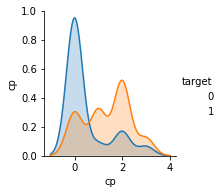

In [13]:
cp = data[['cp', 'target']]
plt.figure(figsize= (16,16), dpi=150)
sns.pairplot(cp, hue='target')

## Insight : we can see that typical angina relates to non disease, while non-anginal pain relates to disease

'cp' : chest pain type, displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non—anginal pain 3 = asymptotic (Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.)

<Figure size 2400x2400 with 0 Axes>

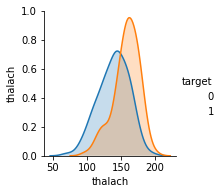

In [14]:
thalach = data[['thalach', 'target']]
plt.figure(figsize= (16,16), dpi=150)
sns.pairplot(thalach, hue='target')

## thalach : maximum heart rate achieved by an individual

We can see that the people with heart disease generally achieved a higher maximum heart rate than people with no disease

Insight, peak heart rates above 150 may tell us about a heart disease.

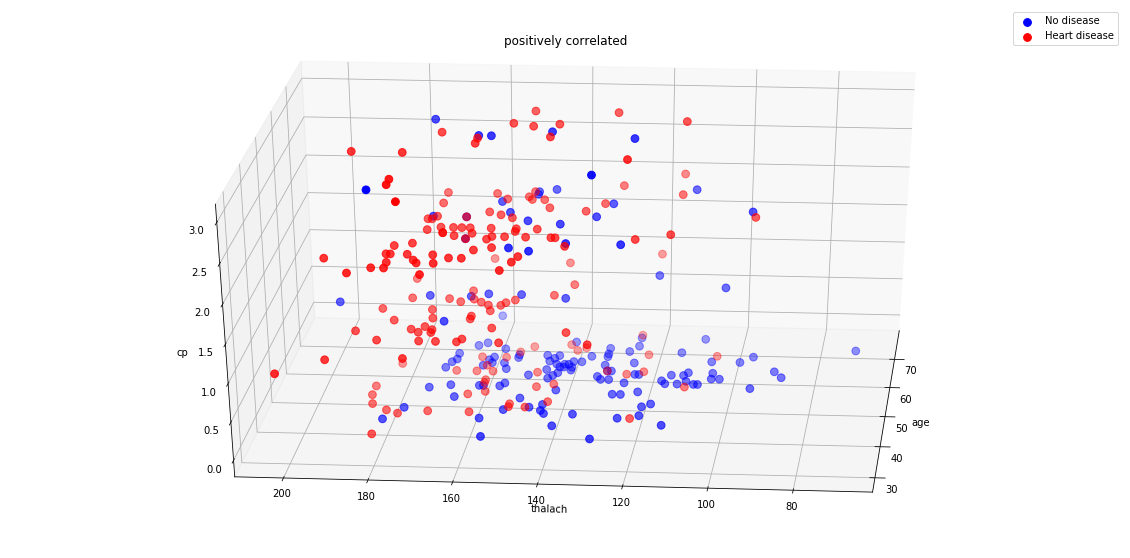

In [24]:
# let's try to get these two last insights in one graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.age[data.target == 0], data["thalach"][data.target == 0], data["cp"][data.target == 0], c='blue', s=60, label = 'No disease')
ax.scatter(data.age[data.target == 1], data["thalach"][data.target == 1], data["cp"][data.target == 1], c='red', s=60, label = 'Heart disease')
ax.view_init(30, 185)
plt.xlabel("age")
plt.ylabel("thalach")
ax.set_zlabel('cp')
plt.title('positively correlated')
plt.legend()
plt.show()

## As we can see on the 3D graph, it is hard to classify the people with disease from the people without, as there are red and blue bubbles everywhere, but still we can try to achieve a good accuracy score.

<Figure size 2400x2400 with 0 Axes>

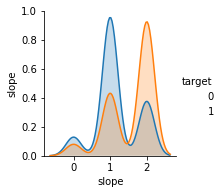

In [15]:
slope = data[['slope', 'target']]
plt.figure(figsize= (16,16), dpi=150)
sns.pairplot(slope, hue='target')

## 'slope' : the slope of the peak exercise ST segment :
0 = upsloping 
1 = flat 
2 = downsloping

a flat slope of the peak exercise ST segment is usually healthy, while a downsloping indicates a heart disease, see the following picture to understand the concept

<img src="iu-2.png">

<Figure size 2400x2400 with 0 Axes>

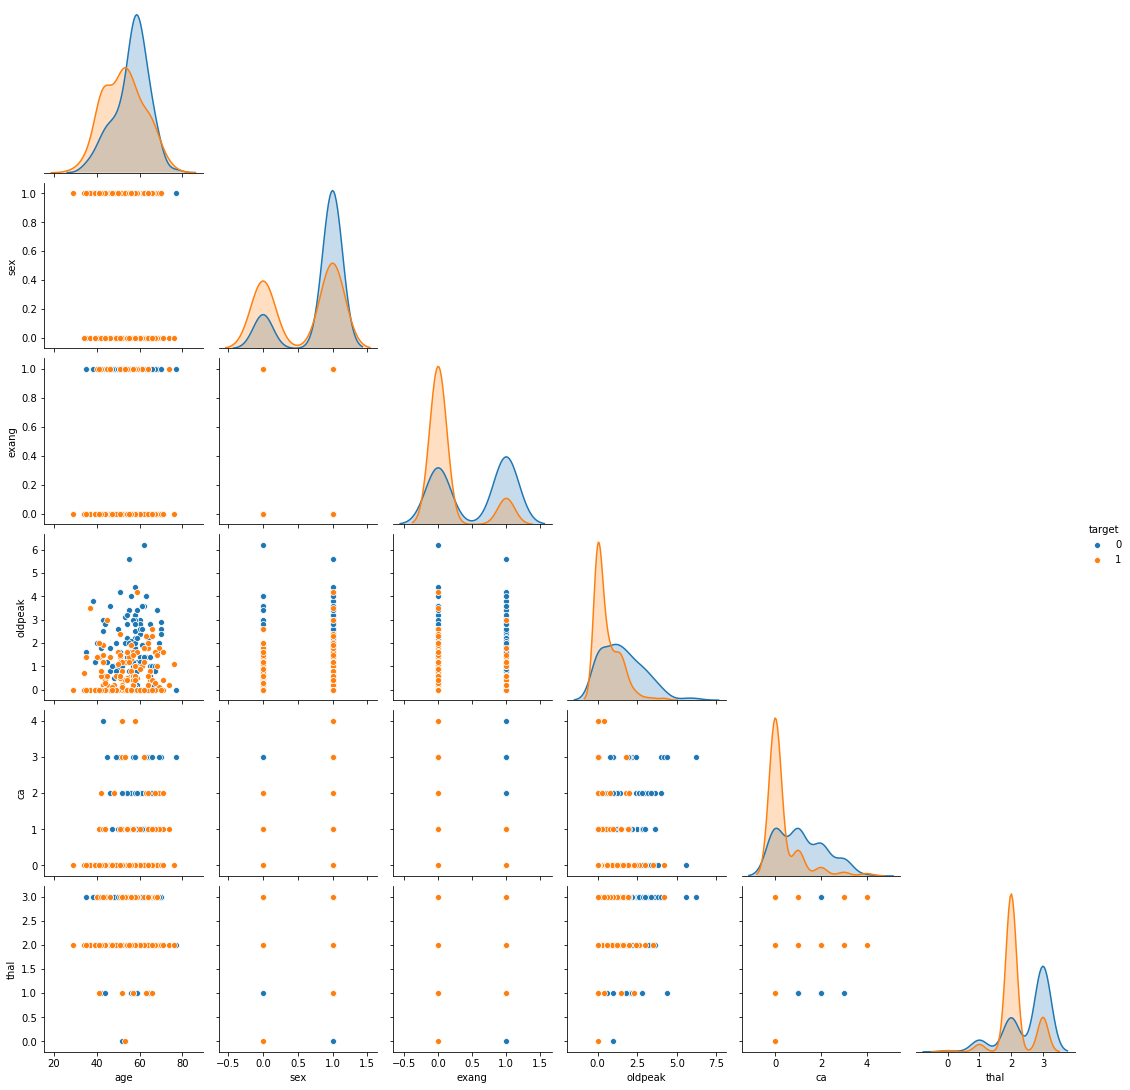

In [16]:
# and now let's explore the negative correlations

plt.figure(figsize= (16,16), dpi=150)
sns.pairplot(negative_corr, hue='target', corner=True)

<Figure size 2400x2400 with 0 Axes>

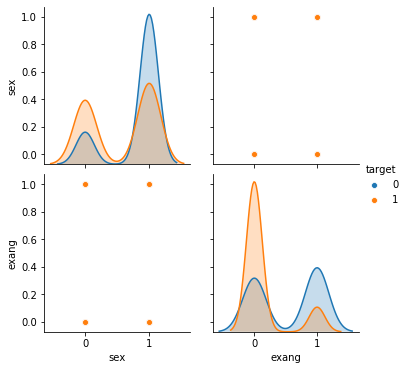

In [17]:
sex_exang = data[['sex','exang' , 'target']]
plt.figure(figsize= (16,16), dpi=150)
sns.pairplot(sex_exang, hue='target')


#sex (0 = female, 1 = male)
# from our sample, heart disease is almost equally distributed among male and female, but healthy people shows a lot more males than females

#exercise induced angina (0 = no, 1 = yes)
# it's curious to see how most people with a hear disease did not get angina induced by exercise (follows the previous insight proving that angina has nothing to do with heart disease)

<Figure size 2400x2400 with 0 Axes>

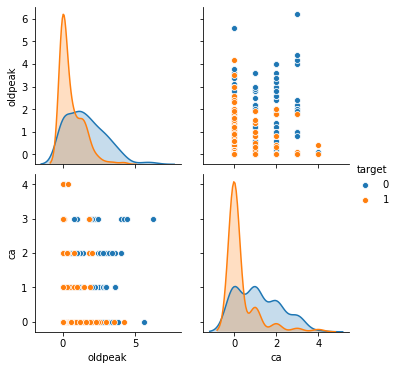

In [18]:
oldpeak_ca = data[['oldpeak','ca' , 'target']]
plt.figure(figsize= (16,16), dpi=150)
sns.pairplot(oldpeak_ca, hue='target')

#'oldpeak' : ST depression induced by exercise relative to rest, float values from 0 to 6
#'ca' : number of major vessels (0-3) colored by flourosopy
#we can see visually that 0 value in oldpeak and ca are related to positive heart disease, where both distributions are skewed on that value.

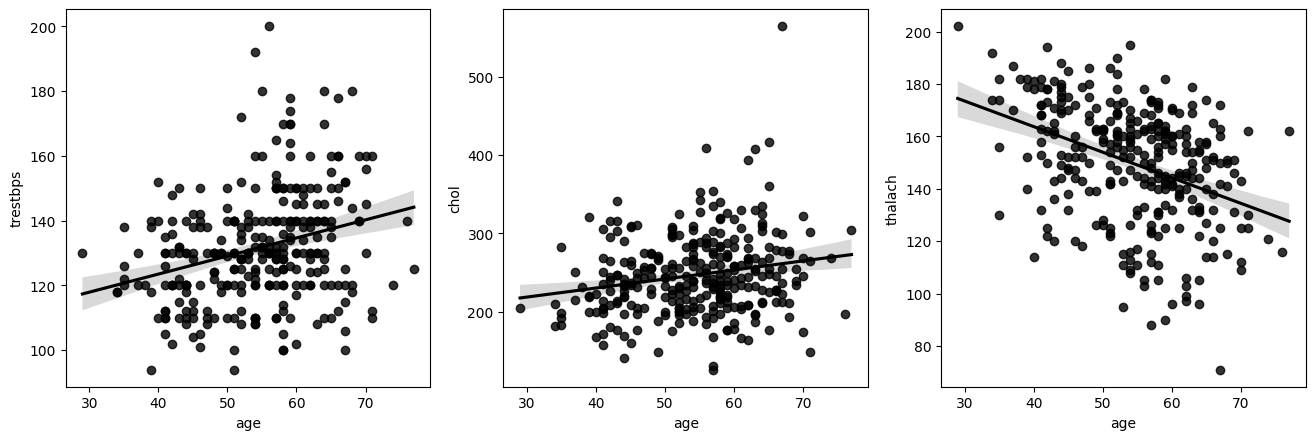

In [19]:
variables = ['trestbps', 'chol',  'thalach']
fig, ax = plt.subplots(1,3,figsize= (16,5), dpi=100)
for i, j in zip(variables, ax.flatten()):
    sns.regplot('age', i, data=data, scatter=True, color='black', ax=j)

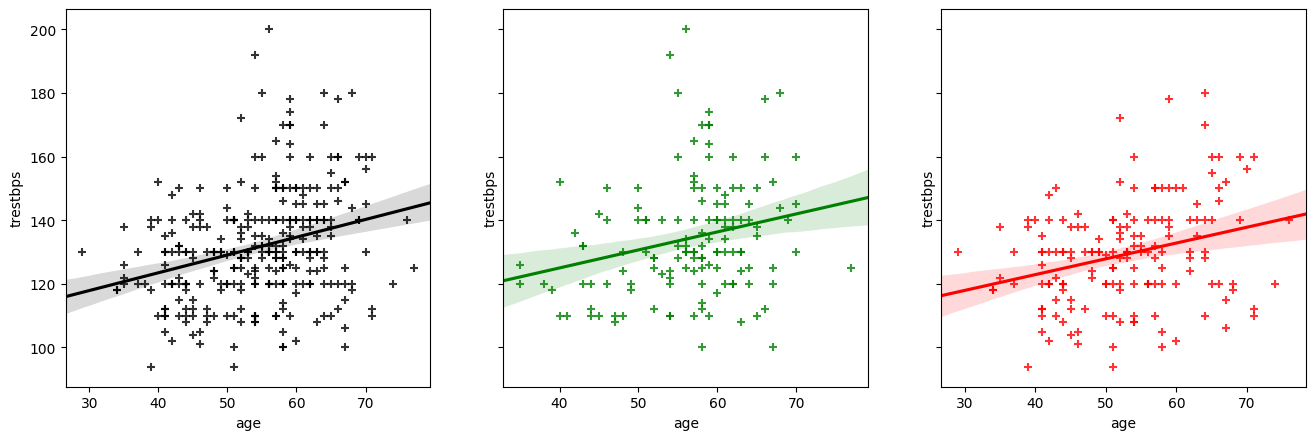

In [20]:
fig, ax = plt.subplots(1,3,figsize= (16,5), sharey=True, dpi=100)
sns.regplot(x='age', y='trestbps', data=data, marker="+", color='black', truncate=False, ax=ax[0])
sns.regplot(x='age', y='trestbps', data=data.loc[data.target == 0], marker="+", color='g', truncate=False, ax=ax[1])
sns.regplot(x='age', y='trestbps', data=data.loc[data.target == 1], marker="+", color='r', truncate=False, ax=ax[2])
# resting blood pressure vs age, it does not change for people with disease vs non disease

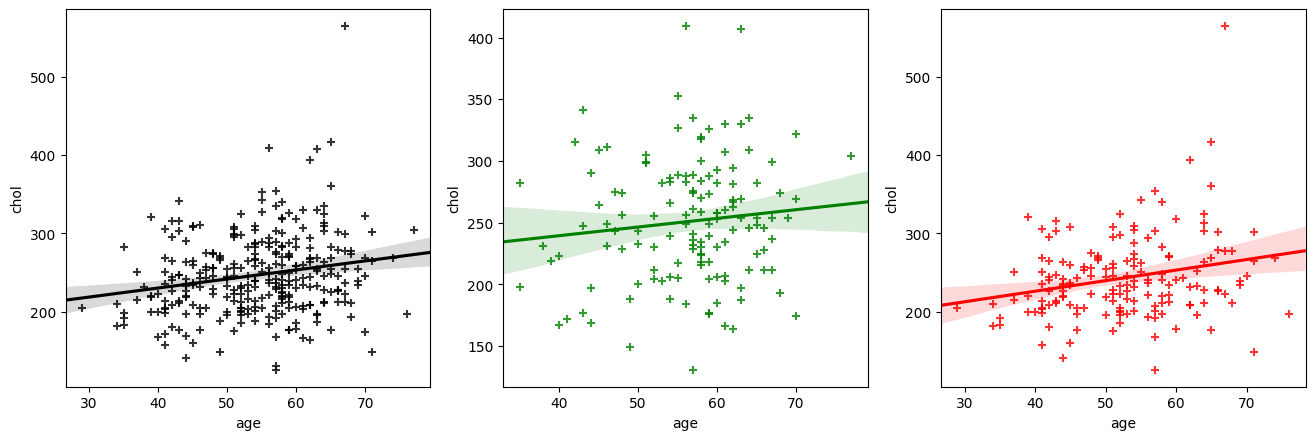

In [21]:
fig, ax = plt.subplots(1,3,figsize= (16,5), dpi=100)
sns.regplot(x='age', y='chol', data=data, marker="+", color='black', truncate=False, ax=ax[0])
sns.regplot(x='age', y='chol', data=data.loc[data.target == 0], marker="+", color='g', truncate=False, ax=ax[1])
sns.regplot(x='age', y='chol', data=data.loc[data.target == 1], marker="+", color='r', truncate=False, ax=ax[2])
# insight: people with heart disease usually have lower cholesterol level than healthy people

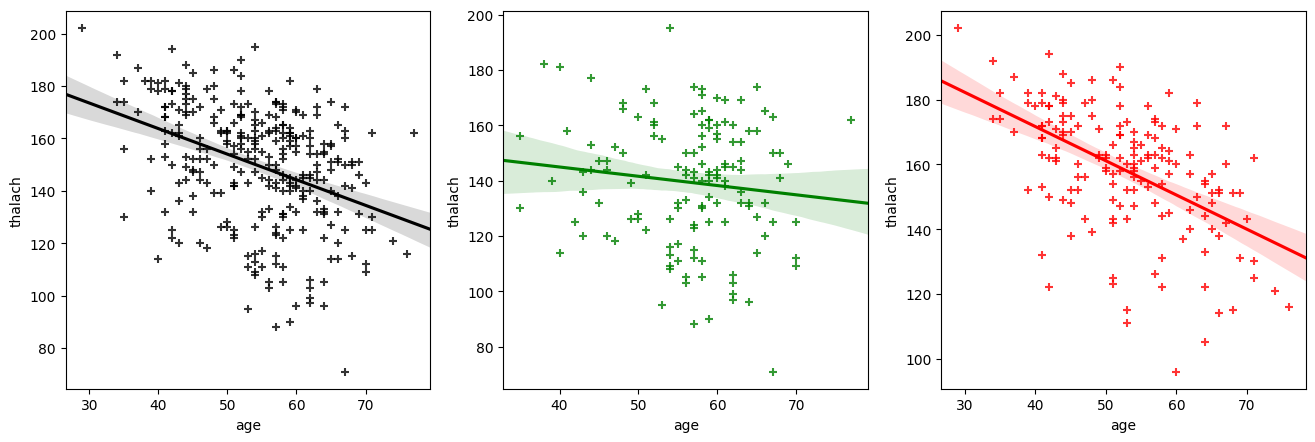

In [22]:
fig, ax = plt.subplots(1,3,figsize= (16,5), dpi=100)
sns.regplot(x='age', y='thalach', data=data, marker="+", color='black', truncate=False, ax=ax[0])
sns.regplot(x='age', y='thalach', data=data.loc[data.target == 0], marker="+", color='g', truncate=False, ax=ax[1])
sns.regplot(x='age', y='thalach', data=data.loc[data.target == 1], marker="+", color='r', truncate=False, ax=ax[2])
# insight: the slope of the regression line (maximum heart rate vs age) is more negative for people with heart disease, and also these people achive higher peaks during late 30's and low 40's, like if the heart works in a higher bpm frequency

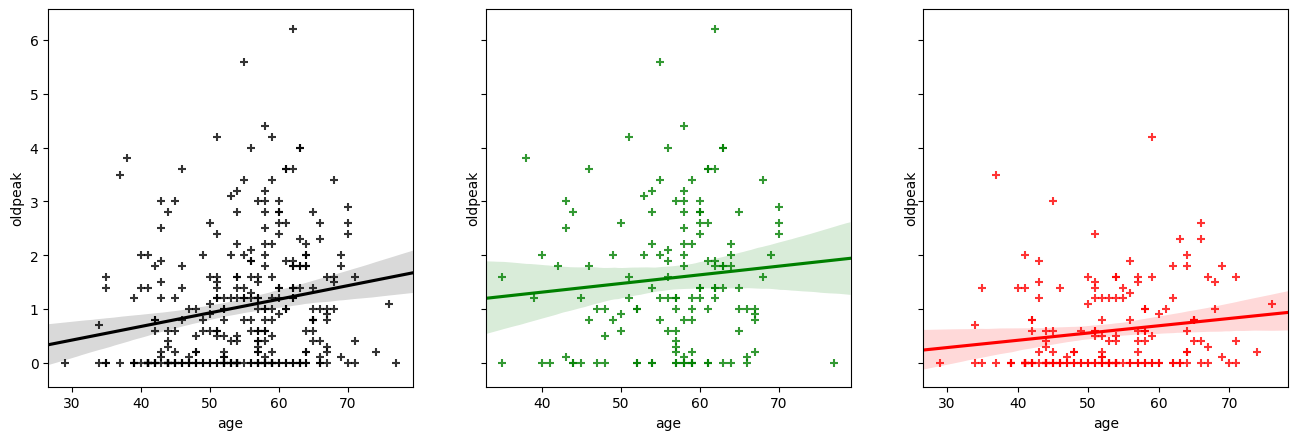

In [23]:
fig, ax = plt.subplots(1,3,figsize= (16,5), sharey=True, dpi=100)
sns.regplot(x='age', y='oldpeak', data=data, marker="+", color='black', truncate=False, ax=ax[0])
sns.regplot(x='age', y='oldpeak', data=data.loc[data.target == 0], marker="+", color='g', truncate=False, ax=ax[1])
sns.regplot(x='age', y='oldpeak', data=data.loc[data.target == 1], marker="+", color='r', truncate=False, ax=ax[2])
plt.show()
# Oldpeak between 0 and 1 usually matches with people with heart disease, while Oldpeak > 1 is for healthy people